<a href="https://colab.research.google.com/github/nitingour1203/Airbnb_bookibg_analysis/blob/main/Airbnb_bookibg_analysis_nitin_gour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <b><u> Project Title :Airbnb_Bookibg_Analysis </u></b>

## </b> Project Summary</b> 

##  Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

## This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

##  Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? 

##<b>Problem Statement<b>
Lets Explore and analyze the Data Set and find some insights(Few Questions Listed Below)

.What can we learn about different hosts and areas?


2.What we learn from room type and their prices according to area?


3.What can we learn from Data? (ex: locations, prices, reviews, etc)


4.Which hosts are the busiest and why is the reason?


5.Which Hosts are charging higher price?


6.Is there any traffic difference among different areas and what could be the reason for it?


7.What is the correlation between different variables ?


8.What is the room count in overall NYC according to the listing of room types?Problem Statement





In [1]:
#Import pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Let us read our data first**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/Airbnb NYC 2019.csv')

In [8]:
df.shape

(48895, 16)

**Prints the first 2 rows of the dataframe**

In [9]:
# We can use the head() method
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


**Prints the basic information about our dataframe**

In [23]:
#We can use the info() method
Data_information = df.info()
Data_information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Missing data**

Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [26]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(16)

,Total,Percent
last_review,10052,0.205583
reviews_per_month,10052,0.205583
host_name,21,0.000429
name,16,0.000327
id,0,0.000000
host_id,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


To handle missing data, we'll delete all the variables with missing data, except the variable 'host_name' and 'name'.

In [40]:
#dealing with missing data
airbnb =df.drop((missing_data[missing_data['Total'] > 21]).index,1)

<ipython-input-40-f3b1dbb5da58>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  airbnb =df.drop((missing_data[missing_data['Total'] > 21]).index,1)


In [41]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  calculated_host_listings_count  

**Prints the list of columns in a dataframe**

In [35]:
#We can use the columns method
all_columns_list = df.columns
all_columns_list

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Get Correlation between different variables**

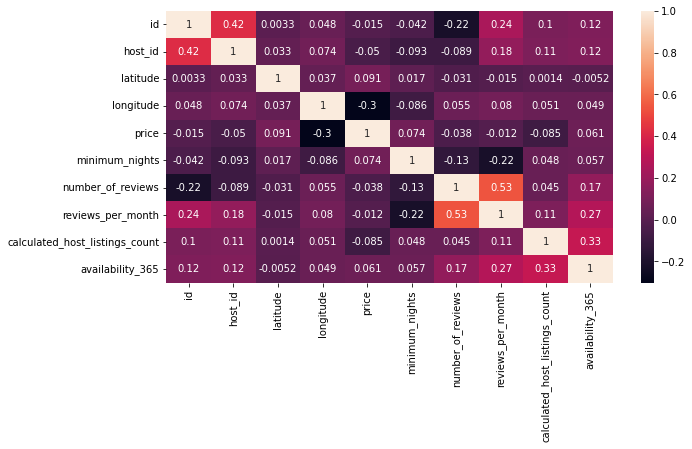

In [36]:
corr = df.corr(method='kendall')
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)
plt.show()

After cleaning the dataset we will do EDA of the datset and in this EDA first thing we will find the neighbourhood group of the NYC and check how many host id belongs to which neighbourhood group.

In [37]:
#We can use the value_counts() method
group_data1=df['neighbourhood_group'].value_counts()
group_data1

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

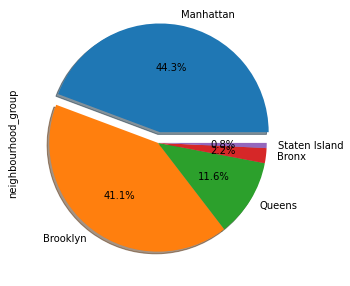

In [38]:
#pie plot neighbourhood_group
group_data1.plot(kind='pie',autopct='%1.1f%%', explode = [0.1, 0, 0, 0,0], shadow=True,figsize=(10,5))
plt.show()

Second thing we will explore and analyze the data to discover:-
*   Which hosts are the busiest and why?



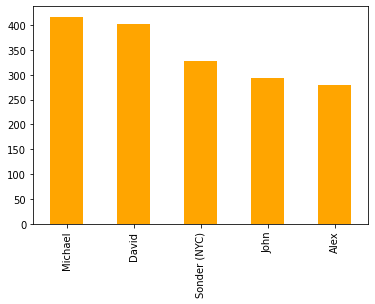

In [33]:
Busiest_host = df['host_name'].value_counts().head(5)
Busiest_host.plot(kind='bar',color='orange')
plt.show()

After exploring and analyzing the data we found Michael,David etc.are the busiest host as we can see from above graph.

We will find the overall descriptive summary of the main variable('Price'). 

In [42]:
#We can use the describe() method
airbnb['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

As we can see the minimum price is zero but it is not possible so we will check first how many price values are zero if values are more in dataset we will consider it and replace that values from minimum value after zero from dataset otherwise drop that rows from dataset.  

In [43]:
missing_price =airbnb[main_Data_frame['price']==0]
missing_price

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,6,333


In [44]:
Data_frame = airbnb.drop(missing_price.index)
Data_frame['price'].describe()

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<ipython-input-22-4c858f78d479>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_frame['price'])


<Axes: xlabel='price', ylabel='Density'>

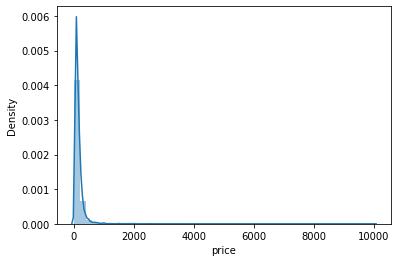

In [22]:
#histogram
sns.distplot(Data_frame['price'])

##<b>What we learn from room type and their prices according to area?<b>

In [45]:
room_price_area_wise = airbnb.groupby(['neighbourhood_group','room_type'])['price'].max().reset_index()
room_price_area_wise.sort_values(by='price', ascending=False).head(10)
     

,neighbourhood_group,room_type,price
3,Brooklyn,Entire home/apt,10000
6,Manhattan,Entire home/apt,10000
10,Queens,Private room,10000
7,Manhattan,Private room,9999
4,Brooklyn,Private room,7500
12,Staten Island,Entire home/apt,5000
9,Queens,Entire home/apt,2600
1,Bronx,Private room,2500
11,Queens,Shared room,1800
0,Bronx,Entire home/apt,1000


##<b>Visualize the data<b>

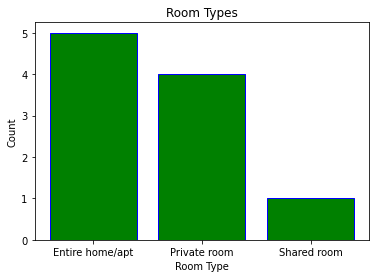

In [46]:
neighbourhood_group = ['Brooklyn', 'Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Staten Island', 'Queens', 'Bronx', 'Queens', 'Bronx']
room_type = ['Entire home/apt', 'Entire home/apt', 'Private room', 'Private room', 'Private room', 'Entire home/apt', 'Entire home/apt', 'Private room', 'Shared room', 'Entire home/apt']

room_dict = {} #Create a dictionary named room_dict to store the count of each room type. Loop through the room_type list and increase the count of the room type in the dictionary if it already exists. If not, add the room type as a key with the count as 1.

for i in room_type:
    room_dict[i] = room_dict.get(i, 0) + 1

plt.bar(room_dict.keys(), room_dict.values(), color='green', edgecolor='blue') #Plot a bar graph using the plt.bar function. The x-axis will be the room types which are the keys of the room_dict dictionary and the y-axis will be the count of each room type which are the values of the room_dict dictionary.
plt.title('Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()
     

##We found that Entire home/apt is the highest number of room types overall and prices are high in the brooklyn and Manhattan for entire home/apt.

##<b>What can we learn from Data? (ex: locations, prices, reviews, etc)<b>

In [47]:
area_reviews = airbnb.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
area_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


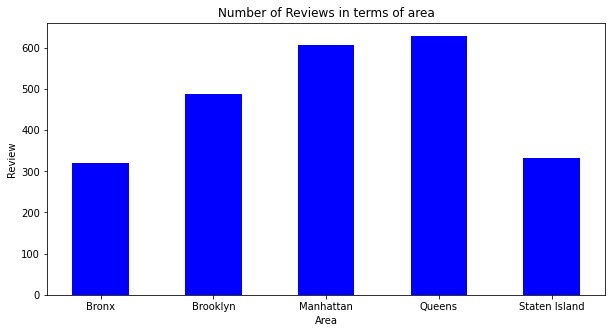

In [48]:
area = area_reviews['neighbourhood_group']
review = area_reviews['number_of_reviews']
fig = plt.figure(figsize =(10,5))

plt.bar(area, review, color ="blue", width =0.5)
plt.xlabel('Area')
plt.ylabel('Review')
plt.title("Number of Reviews in terms of area")
plt.show()

In [49]:
price_area = airbnb.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(10)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9
5,15,19
6,16,43
7,18,1
8,19,76
9,20,116


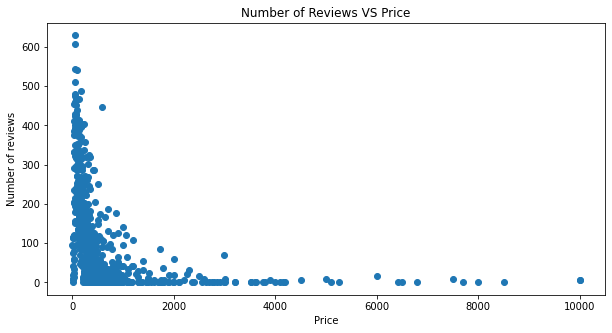

In [50]:

price_list = price_area['price']
review = price_area['number_of_reviews']
fig =plt.figure(figsize =(10,5))

plt.scatter(price_list, review)
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.title('Number of Reviews VS Price')
plt.show()
     

##<b>Which hosts are the busiest and why is the reason?<b>

In [51]:
busy_hosts = airbnb.groupby(['host_id','host_name','room_type'])['number_of_reviews'].max().reset_index()
busy_hosts = busy_hosts.sort_values(by = 'number_of_reviews', ascending =False).head(10)
busy_hosts

,host_id,host_name,room_type,number_of_reviews
24484,47621202,Dona,Private room,629
7707,4734398,Jj,Private room,607
22213,37312959,Maya,Private room,543
4590,2369681,Carol,Private room,540
19443,26432133,Danielle,Private room,510
13707,12949460,Asa,Entire home/apt,488
1974,792159,Wanda,Private room,480
5056,2680820,Linda,Private room,474
161,42273,Dani,Entire home/apt,467
18289,23591164,Angela,Private room,466


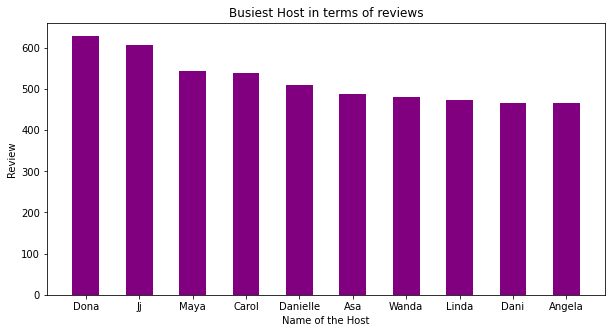

In [52]:
name_hosts = busy_hosts['host_name']
review_got = busy_hosts['number_of_reviews']

fig = plt.figure(figsize =(10,5))

plt.bar(name_hosts,review_got, color ='purple', width =0.5)
plt.xlabel('Name of the Host')
plt.ylabel('Review')
plt.title("Busiest Host in terms of reviews")
plt.show()
     

##<b>We have found Busiest hosts :<b>
Dona

Ji

Maya

Carol

Danielle

















##<b>Because these hosts listed their room type as Entire home and Private room which is preferred by most number of people and also their reviews are higher.<b>We have found Busiest hosts :<b>
.

##<b>Which Hosts are charging higher price?<b>

In [53]:
Highest_price= airbnb.groupby(['host_id','host_name','room_type','neighbourhood_group'])['price'].max().reset_index()
Highest_price= Highest_price.sort_values(by = 'price', ascending =False).head(10)
Highest_price
     

,host_id,host_name,room_type,neighbourhood_group,price
27920,72390391,Jelena,Entire home/apt,Manhattan,10000
17060,20582832,Kathrine,Private room,Queens,10000
8055,5143901,Erin,Entire home/apt,Brooklyn,10000
7325,4382127,Matt,Entire home/apt,Manhattan,9999
2659,1235070,Olson,Entire home/apt,Manhattan,9999
6628,3906464,Amy,Private room,Manhattan,9999
16096,18128455,Rum,Entire home/apt,Manhattan,8500
2561,1177497,Jessica,Entire home/apt,Brooklyn,8000
33424,156158778,Sally,Entire home/apt,Manhattan,7703
10113,7407743,Jack,Entire home/apt,Manhattan,7500


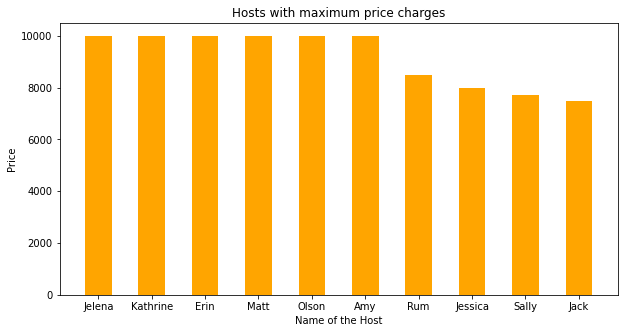

In [56]:
name_of_host = Highest_price ['host_name']
price_charge = Highest_price['price']

fig = plt.figure(figsize =(10,5))

plt.bar(name_of_host,price_charge , color ='orange', width =0.5)
plt.xlabel('Name of the Host')
plt.ylabel('Price')
plt.title("Hosts with maximum price charges")
plt.show()



  <b>Now we have seen that 10 Hosts who are charging maximum price:<b>

    Jelena, Kathrine, Erin, Matt, Olson, Amy, Rum, Jessica, Sally, Jack

       Max Price is 10000 USD

##<b>What is the room count in overall NYC according to the listing of room types?<b>

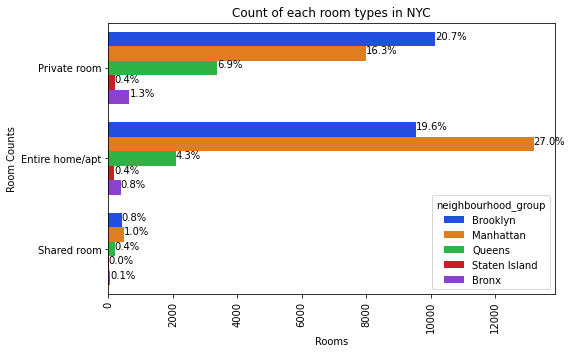

In [57]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=airbnb,palette='bright')

total = len(airbnb['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Count of each room types in NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

 <b> Manhattan has more listed properties with Entire home/apt 
  around 27% of total listed properties followed by Brooklyn with
   around 19.6%.

<b>Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens.<b>

<b>We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types<b>

<b>Conclusion:<b>

We find that Host name Sonder(NYC) has listed highest number of listings in Manhattan followed by Blueground.

We found that Entire home/apt is the highest number of room types overall and prices are high in the brooklyn and Manhattan for entire home/apt.

From above visualization we can say that most number of people like to stay in less price and their reviews are higher in those areas.

We have found Busiest hosts :

Dona, Ji, Maya,Carol,Danielle

Because these hosts listed their room type as Entire home and Private room which is preferred by most number of people and also their reviews are higher.

Now we have seen that 10 Hosts who are charging maximum price:
Jelena,Kathrine,Erin,Matt,Olson,Amy,Rum,Jessica,Sally & Jack

Max Price is 10000 USD

From this visualization We found that most of the people likely to stay at Entire home and Private room which are present in Manhattan, Brooklyn & Queens and also vistors referring stay in room which listing price is less.

We have seen all the correlation between different variables

Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%.

Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens. We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.